In [115]:
# using Pkg;
# Pkg.add("FFTW")


# 1 Zamień sygnał na sumę sygnałów <b>(1 pkt)</b>
np.
```julia
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
```

  Zaobserwuj wynik transformaty i wyjaśnij go.

In [74]:
Fs = 1024;  
t = 0:1/(Fs-1):1; 
x= sin.(2*pi*t*200) + 2* sin.(2*pi*t*400);

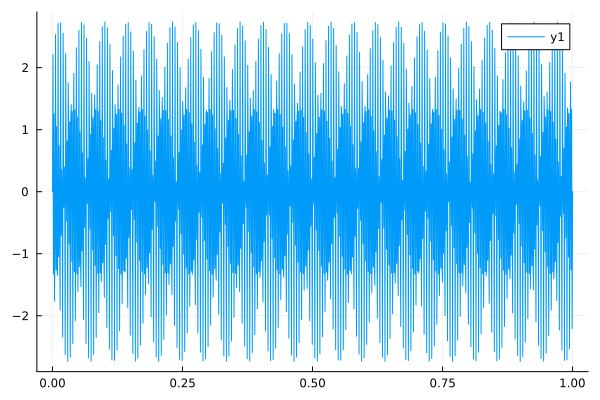

In [75]:
using Plots
plot(t,x)

In [76]:
using FFTW
#Dokonuję transformaty Fouriera
y=fft(x);


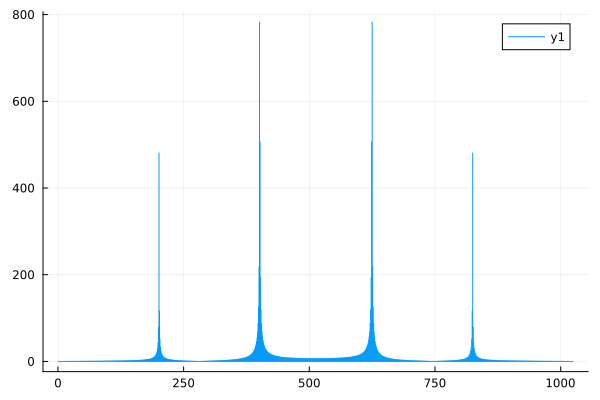

In [77]:
sticks((abs.(fft(x))))

# 2  Usuwanie szumów <b>(1 pkt)</b> :

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Proszę narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla <b> częsci  rzeczywistej</b>. Porównać z wejściowym wykresem sygnału.

In [105]:
using Distributions
Fs = 1024;  
t = 0:1/(Fs-1):1; 
x= 5*cos.(2*pi*t*10) + rand(Float64, Fs);

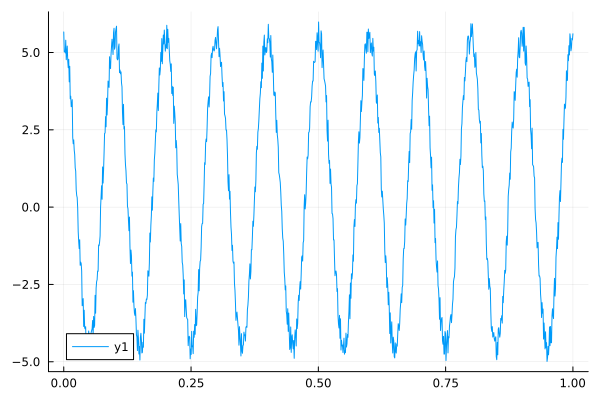

In [106]:
plot(t,x)

In [107]:
y=fft(x);

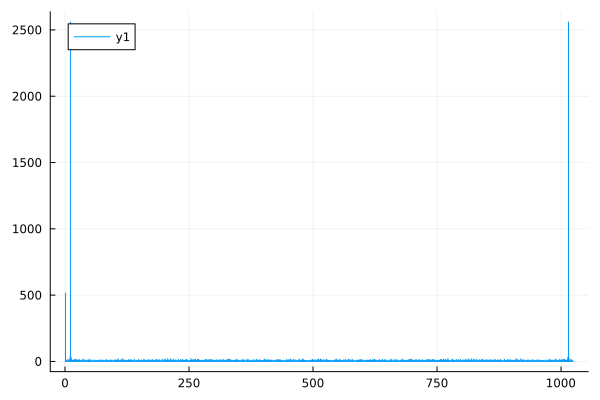

In [108]:
sticks((abs.(y)))

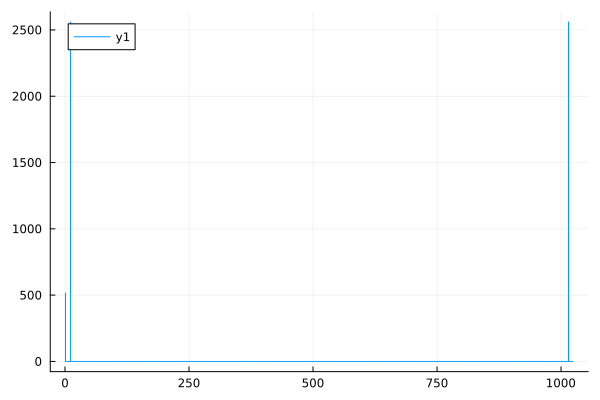

In [111]:
y=fft(x)
selectdim(reinterpret(reshape,Float64,y),1,1)
for (i, val) in enumerate(y)
    if sqrt(real(val)*real(val) + imag(val)*imag(val)) < 50
        y[i] = complex(0.0, 0.0)
    end
end

sticks((abs.(y)))

In [112]:
y_2 = ifft(y);

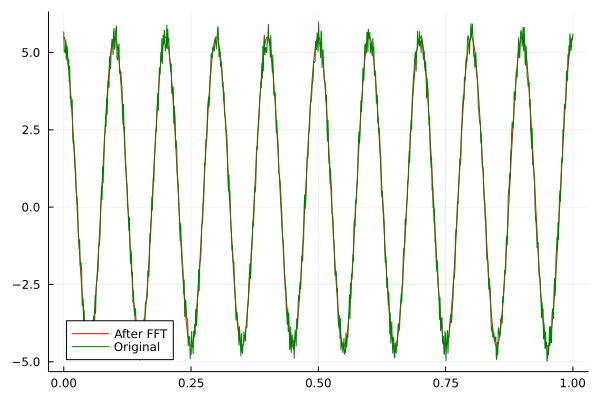

In [113]:
plot(t,real(y_2), label = "After FFT", color = "red")
plot!(t,x, label = "Original", color = "green")


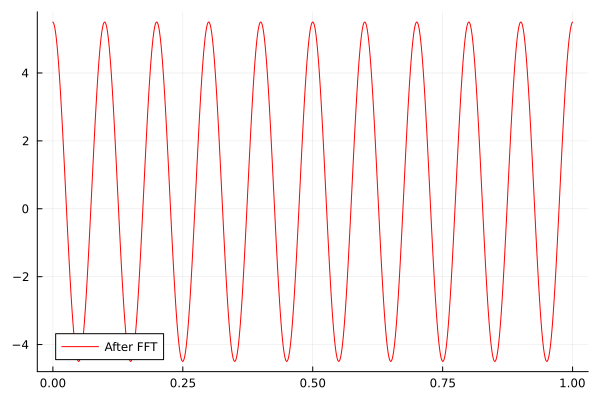

In [114]:
plot(t,real(y_2), label = "After FFT", color = "red")



# 3 Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma. Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt <b>(3 pkt)</b> .
<p>
Przydatne materiały:
     1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
     2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>